In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-08-29 14:04:44.069080: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_ifs_extended.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
9994,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
9995,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
9996,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
9994,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
9995,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
9996,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [7]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
9626,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,54.949997,100.769997,146.470001,48.789997,37.829998,48.779999,20191018T122400Z,20191018T140558.125000Z,-5.958139,-1.545760
4101,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,71.339996,115.869995,160.309998,52.719997,41.770000,52.549999,20151216T131800Z,20151216T145958.125000Z,8.971909,-4.344576
8683,-0.012150,-0.032903,348.149998,2482.060605,1010.236972,1011.460995,6.507286,6.503420,96.736003,96.881840,...,-146.860001,-101.159996,-55.509998,46.570000,35.770000,46.419998,20210703T221800Z,20210703T235958.125000Z,-4.204488,3.573421
6116,0.155169,-0.072199,376.110002,2449.791792,1012.087269,1013.244498,14.877578,14.933106,85.877700,85.194925,...,-144.399994,-98.470001,-52.459999,60.430000,48.969997,60.320000,20170906T005100Z,20170906T023258.125000Z,1.136973,0.297775
4981,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,67.699997,112.379997,156.949997,37.180000,27.869999,37.009998,20160825T133900Z,20160825T151758.125000Z,3.032828,-0.430503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9119,-0.203744,-0.248952,334.574997,2470.989855,994.680703,995.886502,4.406105,4.615132,69.006350,67.089942,...,115.610001,70.769997,25.869999,50.689999,39.770000,50.629997,20181127T232700Z,20181128T011158.125000Z,1.278823,-1.836160
7832,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,49.649998,96.159996,142.500000,62.919998,51.419998,62.949997,20210223T120600Z,20210223T134458.125000Z,-4.810270,17.208559
9509,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,106.619995,61.910000,17.100000,45.549999,35.090000,45.509998,20190926T202700Z,20190926T220858.125000Z,-8.257064,9.131248
2283,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,-24.510000,-69.269997,-114.119995,60.549999,49.480000,60.639999,20180208T151200Z,20180208T165058.125000Z,1.450890,-3.203395


In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

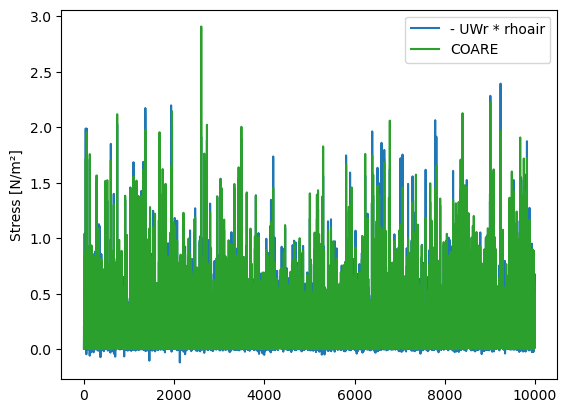

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

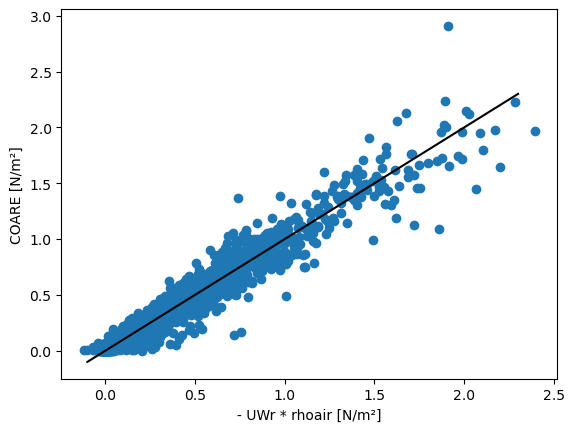

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(9998, 67)

In [13]:
df.shape[0]*0.8

7998.400000000001

In [14]:
split_idx = 8160

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10
9626,-23.692396,-19.716181,-23.761959,54.949997,100.769997,146.470001,48.789997,37.829998,48.779999,-5.958139,-1.545760
4101,-21.523678,-17.208441,-15.873583,71.339996,115.869995,160.309998,52.719997,41.770000,52.549999,8.971909,-4.344576
8683,-17.890451,-15.187499,-22.701605,-146.860001,-101.159996,-55.509998,46.570000,35.770000,46.419998,-4.204488,3.573421
6116,-20.637577,-22.526400,-22.946234,-144.399994,-98.470001,-52.459999,60.430000,48.969997,60.320000,1.136973,0.297775
4981,-15.948977,-8.738081,-16.258532,67.699997,112.379997,156.949997,37.180000,27.869999,37.009998,3.032828,-0.430503
...,...,...,...,...,...,...,...,...,...,...,...
9119,-16.974600,-12.214600,-18.855486,115.610001,70.769997,25.869999,50.689999,39.770000,50.629997,1.278823,-1.836160
7832,-21.509340,-18.463285,-16.534340,49.649998,96.159996,142.500000,62.919998,51.419998,62.949997,-4.810270,17.208559
9509,-22.868994,-17.679859,-20.473143,106.619995,61.910000,17.100000,45.549999,35.090000,45.509998,-8.257064,9.131248
2283,-18.350641,-18.557043,-23.477961,-24.510000,-69.269997,-114.119995,60.549999,49.480000,60.639999,1.450890,-3.203395


In [17]:
y = - df['UWr'] * df['rhoair']
y

9626    0.004143
4101    0.163965
8683    0.048829
6116    0.168094
4981    0.057230
          ...   
9119    0.352143
7832    0.239322
9509    0.028252
2283    0.109268
8799    0.570802
Length: 9998, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

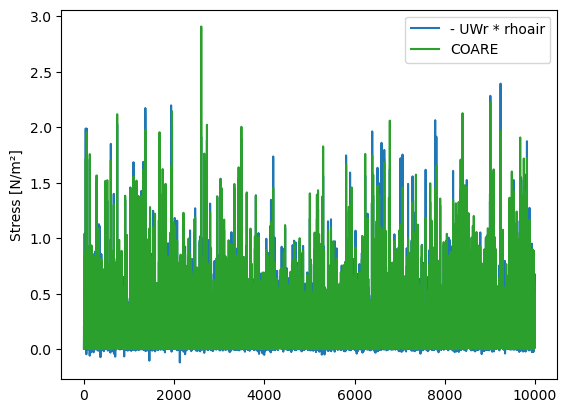

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [24]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [25]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [26]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-08-29 14:04:53.486620: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-29 14:04:53.486943: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-29 14:04:53.486953: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-29 14:04:53.486971: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-hw8rl83-bn-compute): /proc/driver/nvidia/version does not exist
2023-08-29 14:04:53.487170: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

179/179 [==============================] - 1s 2ms/step - loss: 2.8584 - mean_absolute_error: 1.2889 - val_loss: 1.9403 - val_mean_absolute_error: 1.0121
Epoch 2/500
179/179 [==============================] - 0s 618us/step - loss: 2.3906 - mean_absolute_error: 0.9846 - val_loss: 1.4434 - val_mean_absolute_error: 0.8262
Epoch 3/500
179/179 [==============================] - 0s 596us/step - loss: 1.5404 - mean_absolute_error: 0.8140 - val_loss: 1.1961 - val_mean_absolute_error: 0.7258
Epoch 4/500
179/179 [==============================] - 0s 595us/step - loss: 1.3185 - mean_absolute_error: 0.7138 - val_loss: 1.0694 - val_mean_absolute_error: 0.6723
Epoch 5/500
179/179 [==============================] - 0s 594us/step - loss: 0.9220 - mean_absolute_error: 0.6443 - val_loss: 0.9941 - val_mean_absolute_error: 0.6408
Epoch 6/500
179/179 [==============================] - 0s 610us/step - loss: 1.0335 - mean_absolute_error: 0.6396 - val_loss: 0.9386 - val_mean_absolute_error: 0.6108
Epoch 7/500


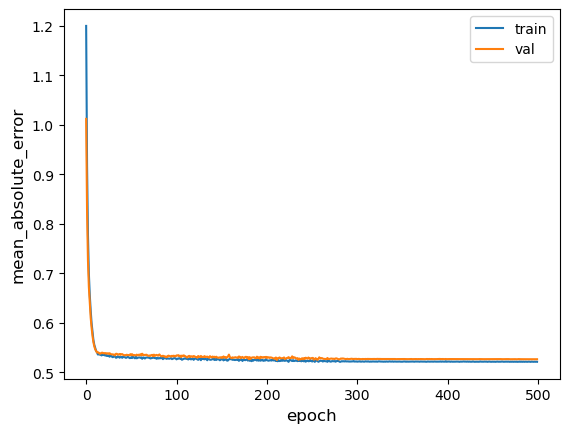

58/58 [==============================] - 0s 342us/step - loss: 0.8626 - mean_absolute_error: 0.5447
Test accuracy 0.5447148680686951
Test loss 0.8626067042350769


In [27]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [28]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [29]:
np.mean(y_test)

0.18563178240262923

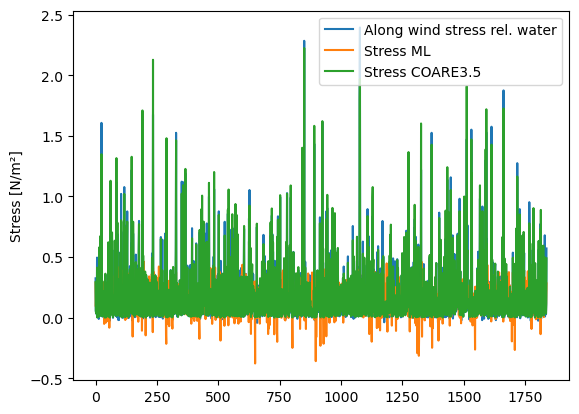

In [30]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

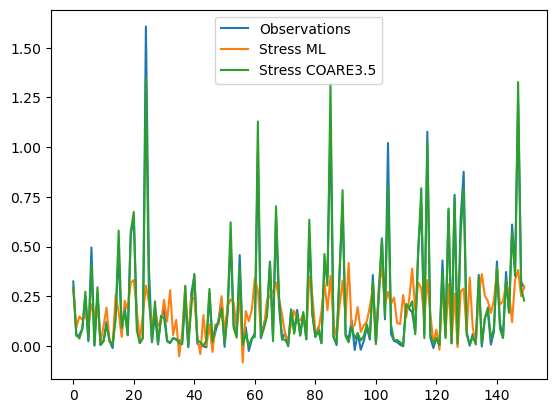

In [31]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

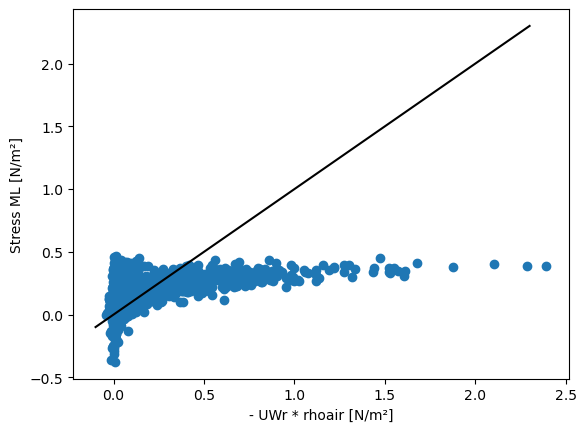

In [32]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

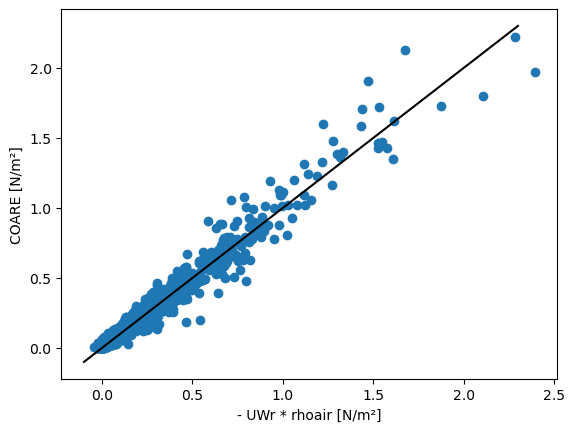

In [33]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [34]:
rmse(y_test.values, y_test_pred)

0.28216043500714866

In [35]:
rmse(y_test.values, c_test)

0.050079547747654496

## Correlation

In [36]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.53917405],
       [0.53917405, 1.        ]])

In [37]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

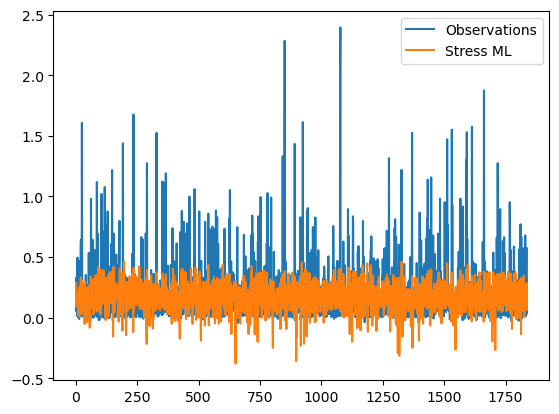

In [38]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [39]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.53917405],
       [0.53917405, 1.        ]])

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

In [41]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.28216043500714866

## Correlation

In [42]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.53917405],
       [0.53917405, 1.        ]])

In [43]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

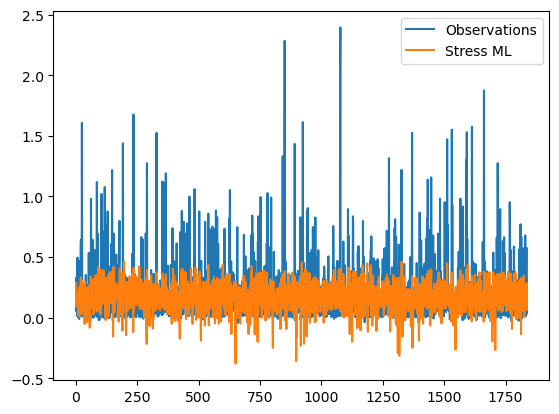

In [44]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [45]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.53917405],
       [0.53917405, 1.        ]])

In [46]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

In [47]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.28216043500714866

# Other experiments

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 0s 1ms/step - loss: 1.1372 - mean_absolute_error: 0.7233 - val_loss: 1.0070 - val_mean_absolute_error: 0.6493
Epoch 2/500
179/179 [==============================] - 0s 716us/step - loss: 0.9057 - mean_absolute_error: 0.6169 - val_loss: 0.8956 - val_mean_absolute_error: 0.5846
Epoch 3/500
179/179 [==============================] - 0s 717us/step - loss: 0.7746 - mean_absolute_error: 0.5568 - val_loss: 0.7921 - val_mean_absolute_error: 0.5380
Epoch 4/500
179/179 [==============================] - 0s 736us/step - loss: 0.7607 - mean_absolute_error: 0.5258 - val_loss: 0.7405 - val_mean_absolute_error: 0.5082
Epoch 5/500
179/179 [==============================] - 0s 715us/step - loss: 0.7351 - mean_absolute_error: 0.5116 - val_loss: 0.7209 - val_mean_absolute_error: 0.4950
Epoch 6/500
179/179 [==============================] - 0s 723us/step - loss: 0.6255 - mean_absolute_error: 0.4816 - val_loss: 0.7132 - val_mean_absolute_error: 0.4904


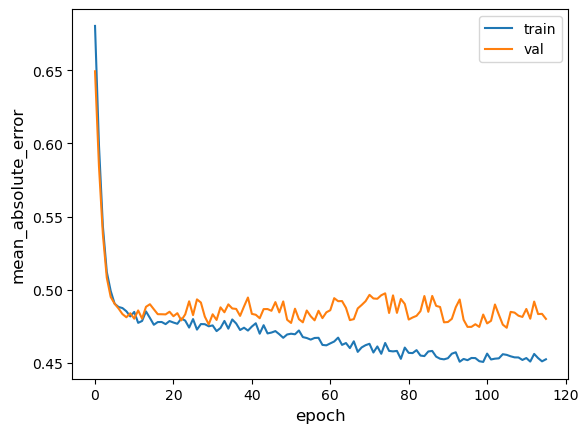

58/58 [==============================] - 0s 355us/step - loss: 0.9268 - mean_absolute_error: 0.5239
Test accuracy 0.5238677859306335
Test loss 0.926763653755188


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

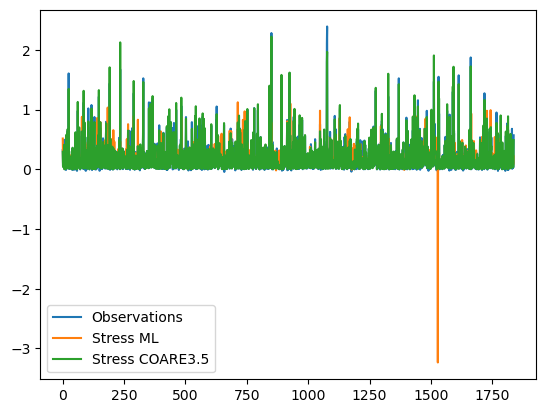

In [53]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

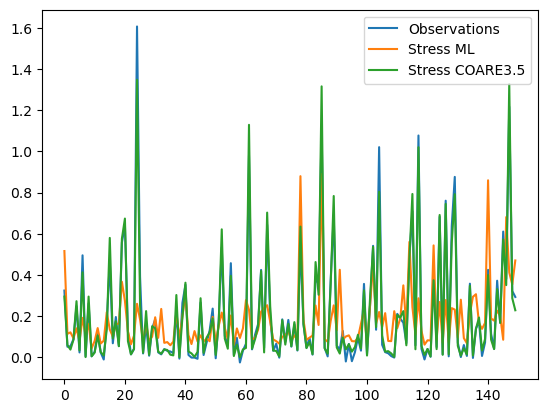

In [54]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [55]:
rmse(y_test.values, y_test_pred)

0.3018583065671062

## Correlation

In [56]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.49734067],
       [0.49734067, 1.        ]])

In [57]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

In [58]:
y_test.values.shape

(1838,)

In [59]:
y_test_pred[:, 0].shape

(1838,)

In [60]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [61]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.32437927, 0.05149074, 0.0539056 , ..., 0.02825179, 0.10926779,
       0.57080157])

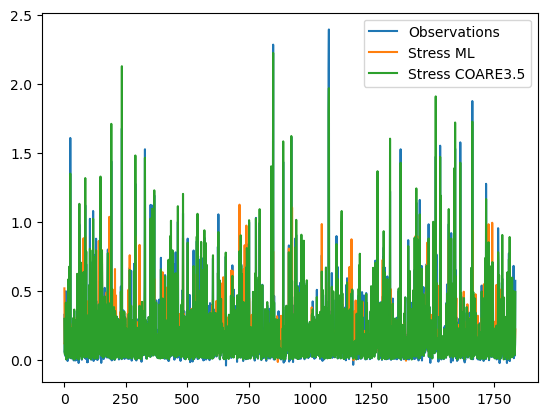

In [62]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

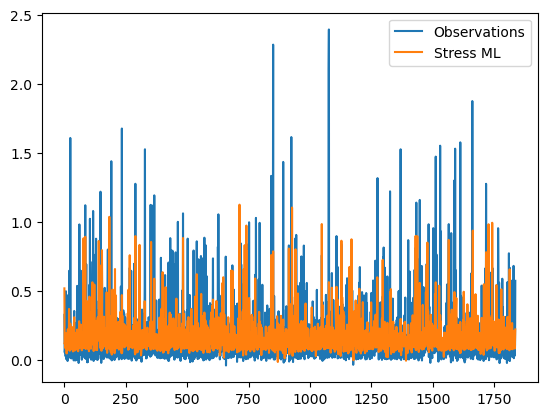

In [63]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [64]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98122817],
       [0.98122817, 1.        ]])

In [65]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2911774525368588

Text(0, 0.5, 'Stress ML [N/m²]')

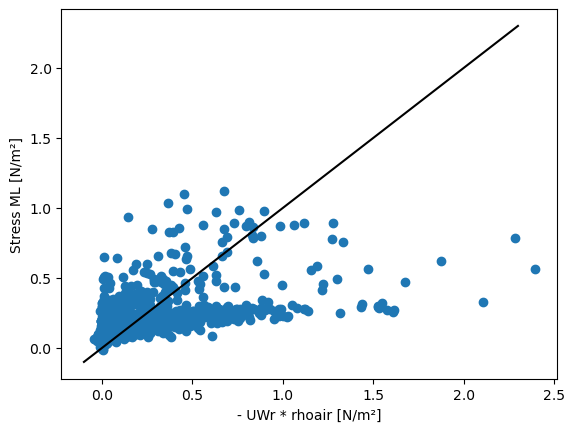

In [66]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [67]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [68]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [69]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 0s 2ms/step - loss: 2.7671 - mean_absolute_error: 1.2830 - val_loss: 1.3423 - val_mean_absolute_error: 0.7532
Epoch 2/500
90/90 [==============================] - 0s 852us/step - loss: 1.7608 - mean_absolute_error: 1.0019 - val_loss: 1.0238 - val_mean_absolute_error: 0.6231
Epoch 3/500
90/90 [==============================] - 0s 850us/step - loss: 1.3616 - mean_absolute_error: 0.8513 - val_loss: 0.9451 - val_mean_absolute_error: 0.5951
Epoch 4/500
90/90 [==============================] - 0s 838us/step - loss: 1.2067 - mean_absolute_error: 0.7792 - val_loss: 0.9148 - val_mean_absolute_error: 0.5829
Epoch 5/500
90/90 [==============================] - 0s 860us/step - loss: 1.0685 - mean_absolute_error: 0.7297 - val_loss: 0.8949 - val_mean_absolute_error: 0.5759
Epoch 6/500
90/90 [==============================] - 0s 833us/step - loss: 1.0181 - mean_absolute_error: 0.6792 - val_loss: 0.8780 - val_mean_absolute_error: 0.5654
Epoch 7/500


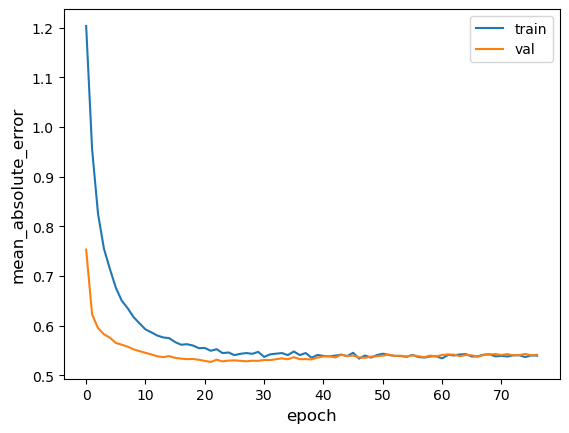

58/58 [==============================] - 0s 331us/step - loss: 1.0794 - mean_absolute_error: 0.5754
Test accuracy 0.5753536224365234
Test loss 1.0793896913528442


In [70]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [71]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [72]:
rmse(y_test.values, y_test_pred)

0.28104384734480464

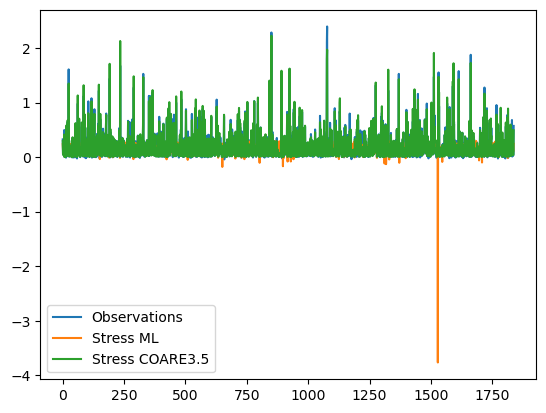

In [73]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

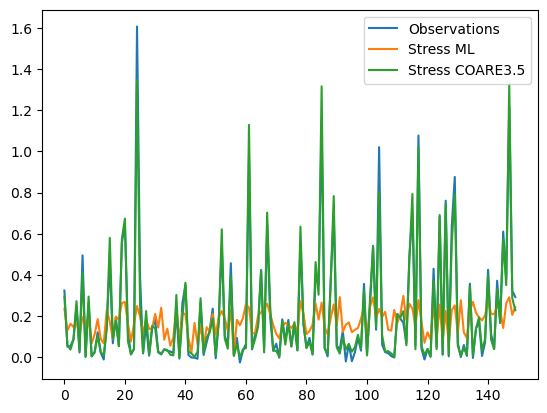

In [74]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

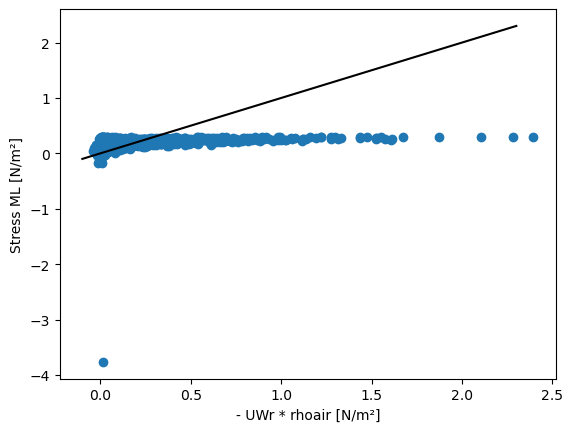

In [75]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [76]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.34197603],
       [0.34197603, 1.        ]])

In [77]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

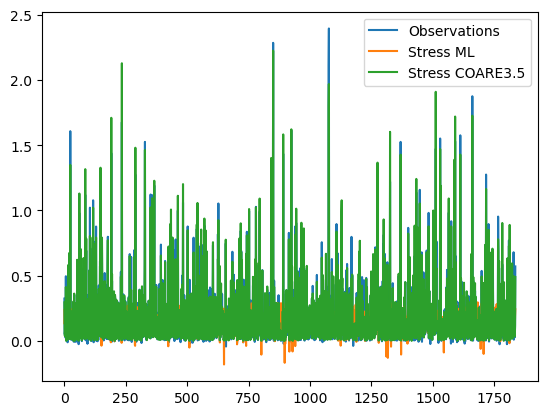

In [78]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

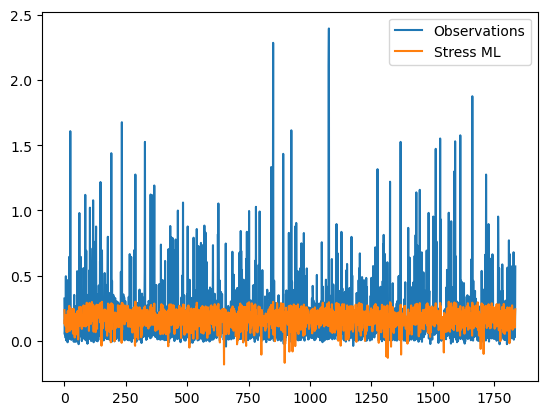

In [79]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [80]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98122817],
       [0.98122817, 1.        ]])

In [81]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2655564479173994

Text(0, 0.5, 'Stress ML [N/m²]')

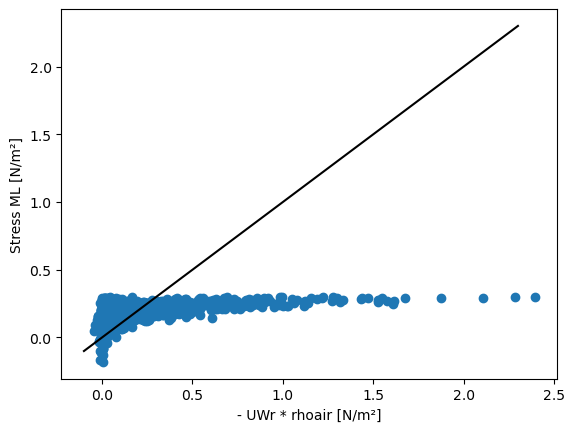

In [82]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [83]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [84]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [85]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 3.0424 - mean_absolute_error: 1.3499 - val_loss: 1.0606 - val_mean_absolute_error: 0.6597
Epoch 2/500
179/179 [==============================] - 0s 715us/step - loss: 1.2724 - mean_absolute_error: 0.8241 - val_loss: 0.8861 - val_mean_absolute_error: 0.5930
Epoch 3/500
179/179 [==============================] - 0s 705us/step - loss: 0.9953 - mean_absolute_error: 0.7017 - val_loss: 0.8180 - val_mean_absolute_error: 0.5574
Epoch 4/500
179/179 [==============================] - 0s 705us/step - loss: 0.8433 - mean_absolute_error: 0.6395 - val_loss: 0.7885 - val_mean_absolute_error: 0.5407
Epoch 5/500
179/179 [==============================] - 0s 721us/step - loss: 0.8089 - mean_absolute_error: 0.6051 - val_loss: 0.7738 - val_mean_absolute_error: 0.5293
Epoch 6/500
179/179 [==============================] - 0s 712us/step - loss: 0.7713 - mean_absolute_error: 0.5779 - val_loss: 0.7696 - val_mean_absolute_error: 0.5246


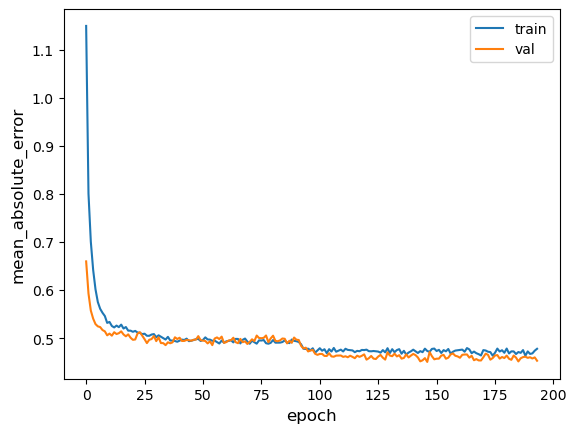

58/58 [==============================] - 0s 312us/step - loss: 0.7854 - mean_absolute_error: 0.4881
Test accuracy 0.48812296986579895
Test loss 0.7853639125823975


In [86]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [87]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [88]:
rmse(y_test.values, y_test_pred)

0.28684927702461305

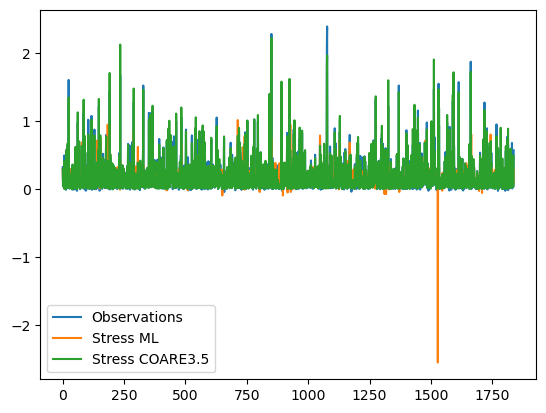

In [89]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

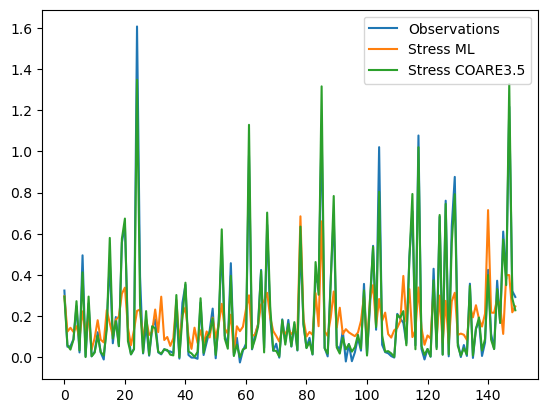

In [90]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

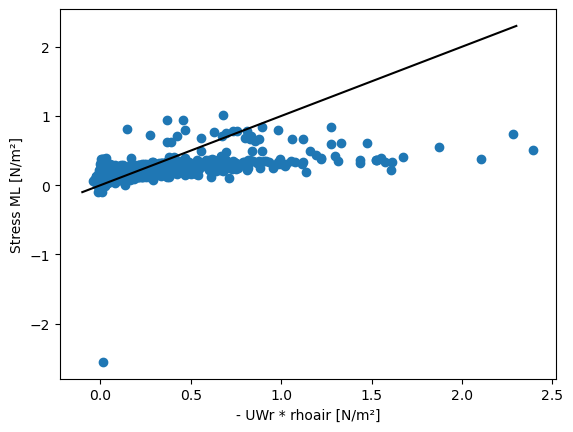

In [91]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [92]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.59756486],
       [0.59756486, 1.        ]])

In [93]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

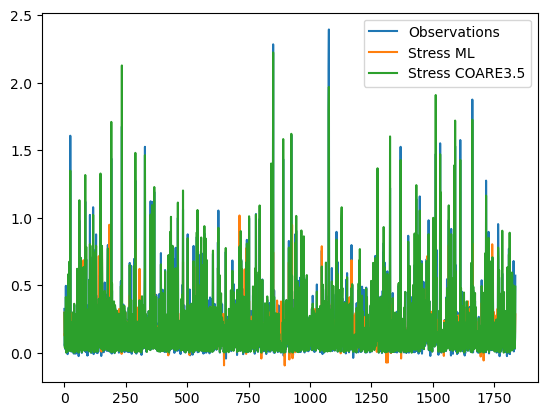

In [94]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

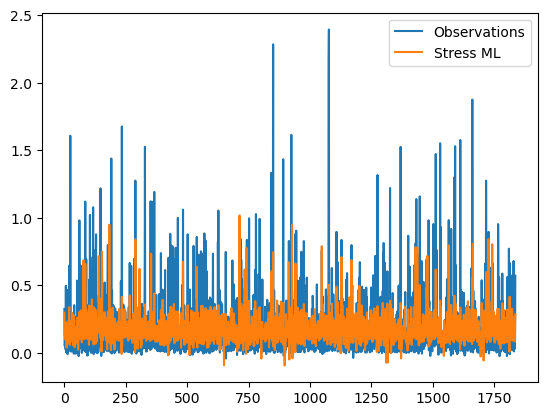

In [95]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [96]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.98122817],
       [0.98122817, 1.        ]])

In [97]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.27970415715396507

Text(0, 0.5, 'Stress ML [N/m²]')

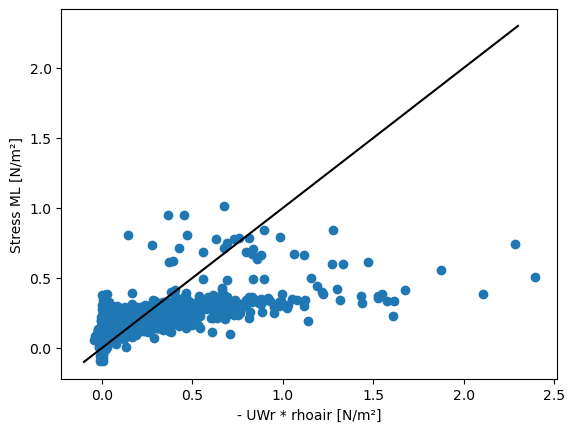

In [98]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [99]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [100]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [101]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.6098 - mean_absolute_error: 0.8972 - val_loss: 0.8767 - val_mean_absolute_error: 0.5364
Epoch 2/500
179/179 [==============================] - 0s 1ms/step - loss: 0.9542 - mean_absolute_error: 0.6647 - val_loss: 0.7276 - val_mean_absolute_error: 0.4889
Epoch 3/500
179/179 [==============================] - 0s 1ms/step - loss: 0.8060 - mean_absolute_error: 0.6085 - val_loss: 0.7111 - val_mean_absolute_error: 0.4915
Epoch 4/500
179/179 [==============================] - 0s 1ms/step - loss: 0.6759 - mean_absolute_error: 0.5670 - val_loss: 0.6973 - val_mean_absolute_error: 0.4930
Epoch 5/500
179/179 [==============================] - 0s 1ms/step - loss: 0.6956 - mean_absolute_error: 0.5374 - val_loss: 0.7135 - val_mean_absolute_error: 0.4970
Epoch 6/500
179/179 [==============================] - 0s 1ms/step - loss: 0.6575 - mean_absolute_error: 0.5239 - val_loss: 0.6855 - val_mean_absolute_error: 0.4674
Epoch 7/50

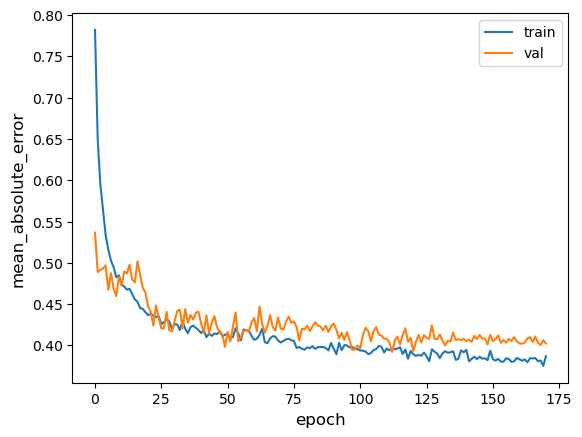

58/58 [==============================] - 0s 321us/step - loss: 0.6310 - mean_absolute_error: 0.4368
Test accuracy 0.43682560324668884
Test loss 0.6310464143753052


In [102]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [103]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [104]:
rmse(y_test.values, y_test_pred)

0.29749541705206817

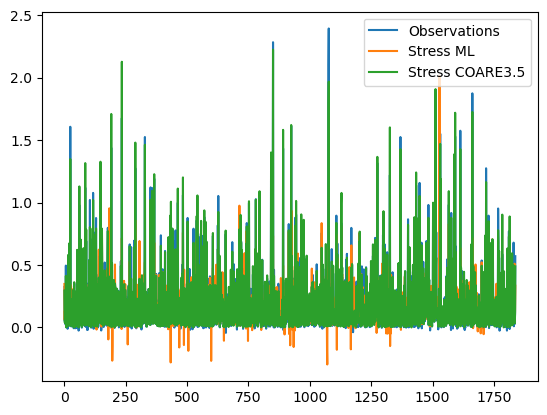

In [105]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

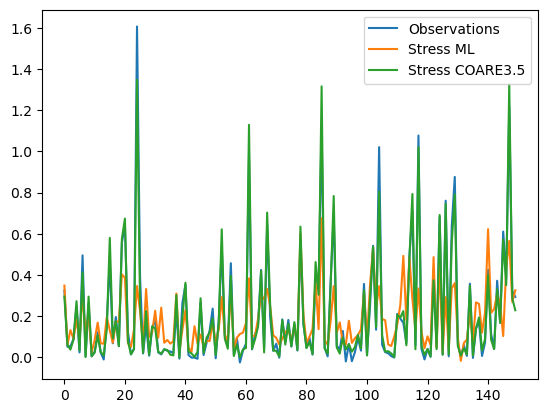

In [106]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

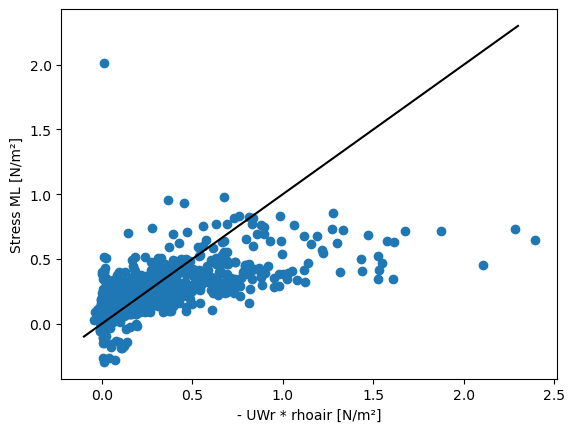

In [107]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [108]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.69727217],
       [0.69727217, 1.        ]])

In [109]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

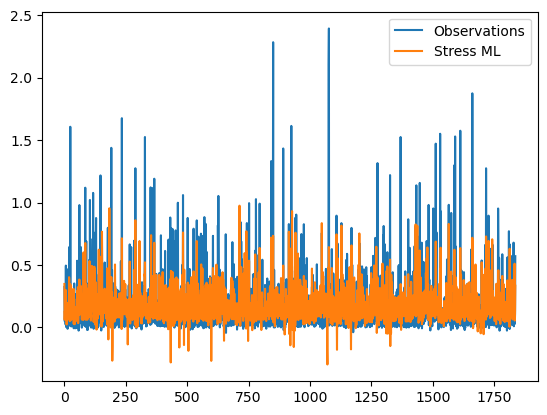

In [110]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [111]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

In [112]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.29749541705206817

Text(0, 0.5, 'Stress ML [N/m²]')

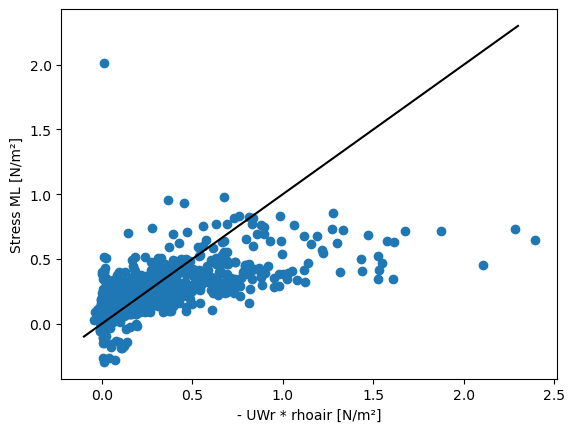

In [113]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [114]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.69727217],
       [0.69727217, 1.        ]])

In [115]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

In [116]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [117]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [118]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 5ms/step - loss: 3.3327 - mean_absolute_error: 1.3120 - val_loss: 0.9587 - val_mean_absolute_error: 0.7255
Epoch 2/500
179/179 [==============================] - 1s 4ms/step - loss: 0.9908 - mean_absolute_error: 0.7208 - val_loss: 0.7785 - val_mean_absolute_error: 0.6153
Epoch 3/500
179/179 [==============================] - 1s 4ms/step - loss: 0.9139 - mean_absolute_error: 0.6609 - val_loss: 0.6632 - val_mean_absolute_error: 0.4996
Epoch 4/500
179/179 [==============================] - 1s 5ms/step - loss: 0.7392 - mean_absolute_error: 0.5830 - val_loss: 0.6155 - val_mean_absolute_error: 0.4468
Epoch 5/500
179/179 [==============================] - 1s 4ms/step - loss: 0.7058 - mean_absolute_error: 0.5443 - val_loss: 0.5914 - val_mean_absolute_error: 0.4545
Epoch 6/500
179/179 [==============================] - 1s 4ms/step - loss: 0.5591 - mean_absolute_error: 0.4901 - val_loss: 0.5880 - val_mean_absolute_error: 0.4565
Epoch 7/50

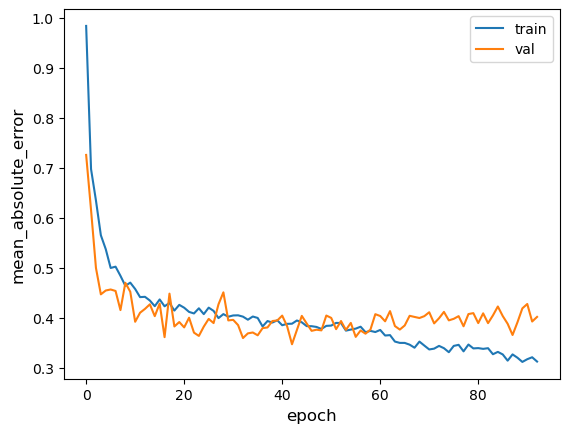

58/58 [==============================] - 0s 750us/step - loss: 0.6853 - mean_absolute_error: 0.4411
Test accuracy 0.4410613477230072
Test loss 0.6852853298187256


In [119]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [120]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [121]:
rmse(y_test.values, y_test_pred)

0.2955714723913589

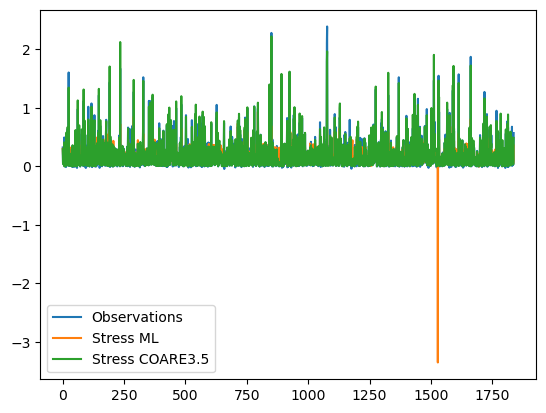

In [122]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

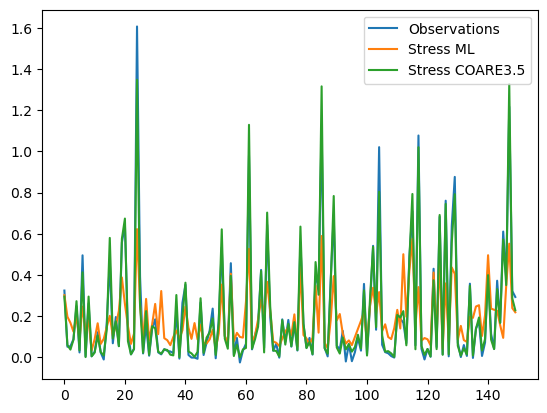

In [123]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [124]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.66325675],
       [0.66325675, 1.        ]])

In [125]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

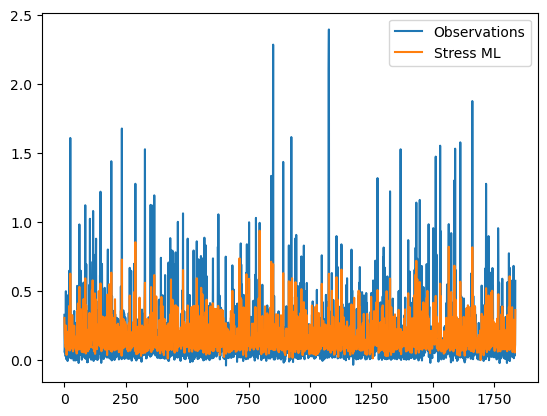

In [126]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [127]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.98122817],
       [0.98122817, 1.        ]])

In [128]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.28387314278237336

Text(0, 0.5, 'Stress ML [N/m²]')

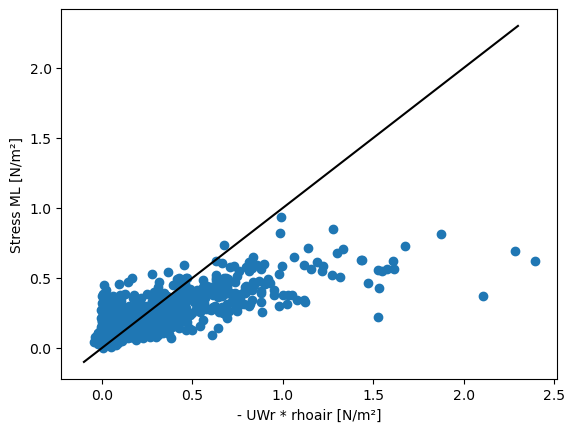

In [129]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [130]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [131]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [132]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 3s 12ms/step - loss: 3.6948 - mean_absolute_error: 1.2752 - val_loss: 1.0493 - val_mean_absolute_error: 0.5403
Epoch 2/500
179/179 [==============================] - 2s 11ms/step - loss: 1.0488 - mean_absolute_error: 0.7438 - val_loss: 0.8158 - val_mean_absolute_error: 0.5273
Epoch 3/500
179/179 [==============================] - 2s 12ms/step - loss: 0.7690 - mean_absolute_error: 0.6224 - val_loss: 0.6599 - val_mean_absolute_error: 0.5068
Epoch 4/500
179/179 [==============================] - 2s 11ms/step - loss: 0.7439 - mean_absolute_error: 0.5943 - val_loss: 0.6386 - val_mean_absolute_error: 0.4921
Epoch 5/500
179/179 [==============================] - 2s 12ms/step - loss: 0.6619 - mean_absolute_error: 0.5541 - val_loss: 0.6485 - val_mean_absolute_error: 0.5024
Epoch 6/500
179/179 [==============================] - 2s 11ms/step - loss: 0.6497 - mean_absolute_error: 0.5200 - val_loss: 0.6007 - val_mean_absolute_error: 0.4854
Epoc

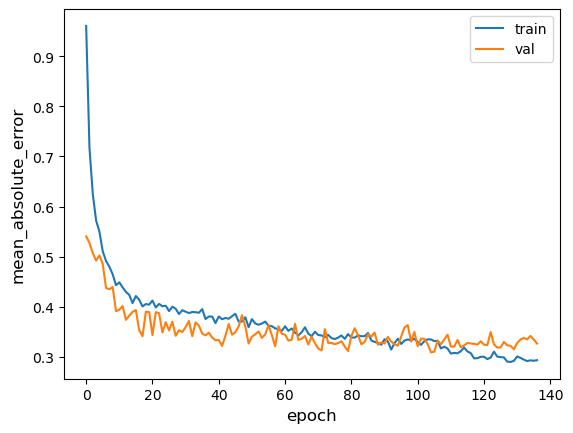

58/58 [==============================] - 0s 2ms/step - loss: 0.7714 - mean_absolute_error: 0.3645
Test accuracy 0.36448702216148376
Test loss 0.7714396715164185


In [133]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [134]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [135]:
rmse(y_test.values, y_test_pred)

0.3435847713591663

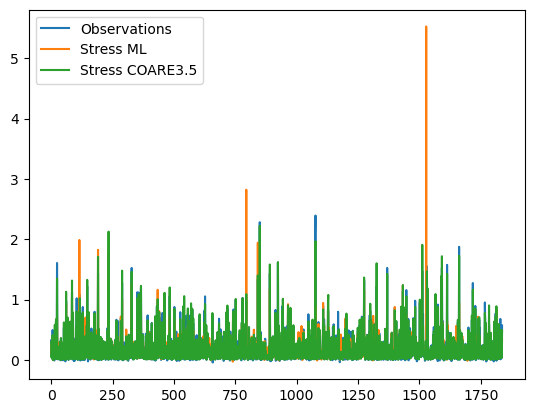

In [136]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

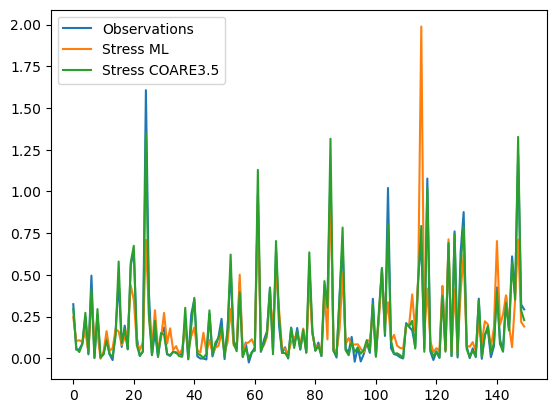

In [137]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [138]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.64938945],
       [0.64938945, 1.        ]])

In [139]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

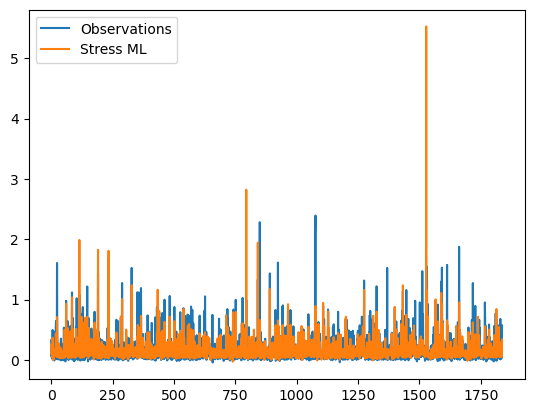

In [140]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [141]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

In [142]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3435847713591663

Text(0, 0.5, 'Stress ML [N/m²]')

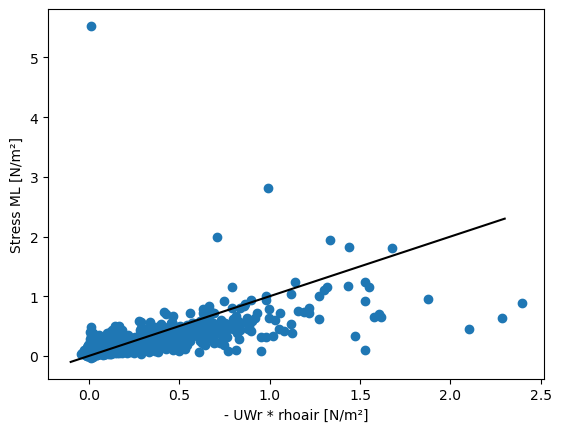

In [143]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

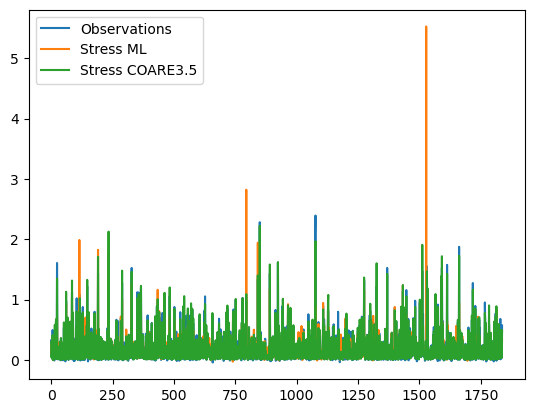

In [144]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

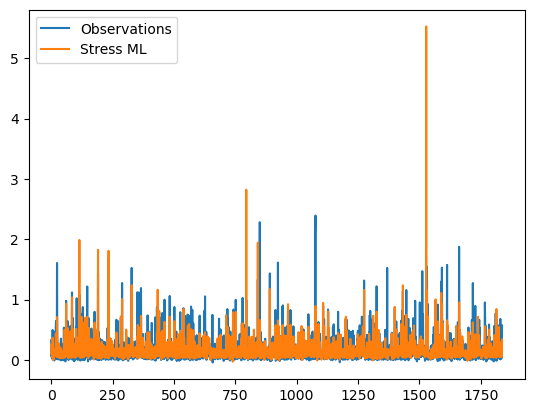

In [145]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [146]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.64938945],
       [0.64938945, 1.        ]])

In [147]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

In [148]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.3435847713591663

Text(0, 0.5, 'Stress ML [N/m²]')

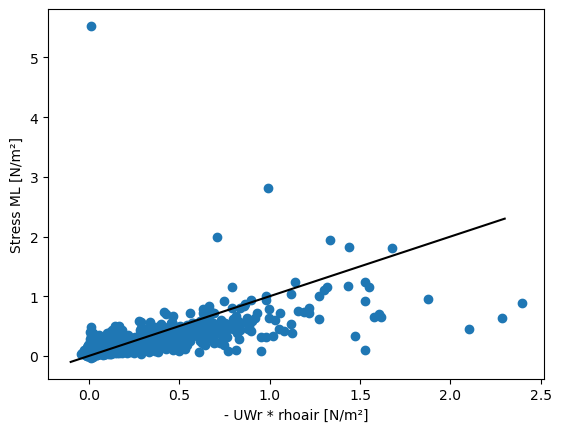

In [149]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [150]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [151]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [152]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 38ms/step - loss: 20.6105 - mean_absolute_error: 2.8932 - val_loss: 1.0209 - val_mean_absolute_error: 0.6788
Epoch 2/500
12/12 [==============================] - 0s 29ms/step - loss: 2.3220 - mean_absolute_error: 1.1442 - val_loss: 0.9267 - val_mean_absolute_error: 0.6174
Epoch 3/500
12/12 [==============================] - 0s 28ms/step - loss: 1.3864 - mean_absolute_error: 0.8551 - val_loss: 0.9650 - val_mean_absolute_error: 0.5725
Epoch 4/500
12/12 [==============================] - 0s 28ms/step - loss: 1.3849 - mean_absolute_error: 0.8188 - val_loss: 0.9854 - val_mean_absolute_error: 0.5714
Epoch 5/500
12/12 [==============================] - 0s 28ms/step - loss: 1.0806 - mean_absolute_error: 0.7472 - val_loss: 0.9782 - val_mean_absolute_error: 0.5615
Epoch 6/500
12/12 [==============================] - 0s 28ms/step - loss: 1.1100 - mean_absolute_error: 0.7277 - val_loss: 0.9964 - val_mean_absolute_error: 0.5670
Epoch 7/500
12/

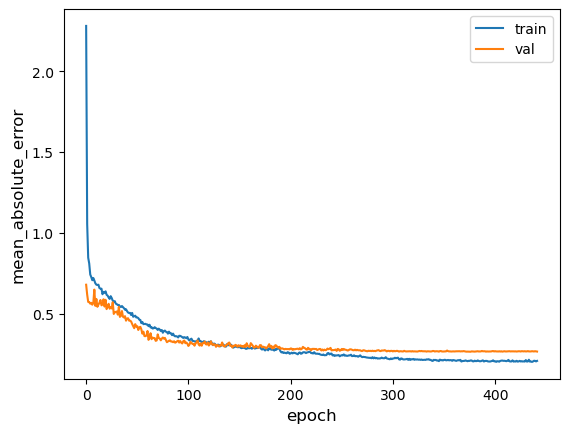

58/58 [==============================] - 0s 2ms/step - loss: 0.2879 - mean_absolute_error: 0.2761
Test accuracy 0.2761325240135193
Test loss 0.2878706157207489


In [153]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [154]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [155]:
rmse(y_test.values, y_test_pred)

0.3357818367002982

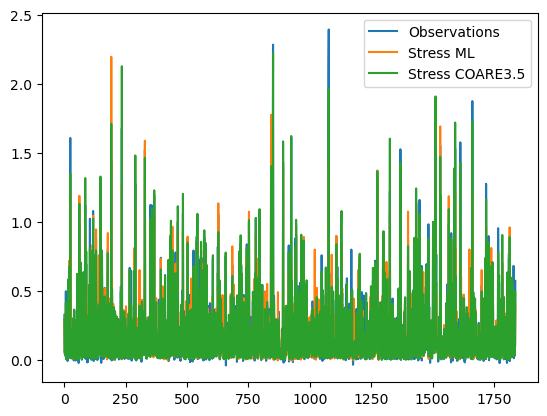

In [156]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

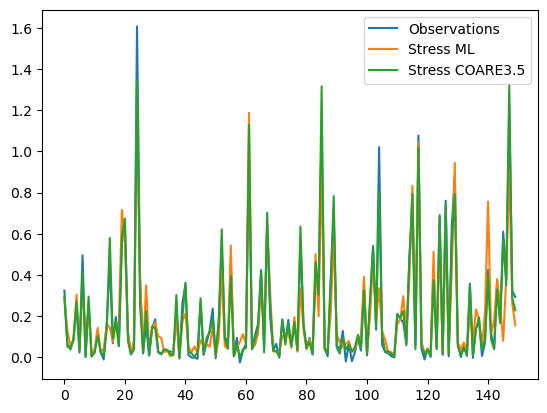

In [157]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [158]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87285799],
       [0.87285799, 1.        ]])

In [159]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

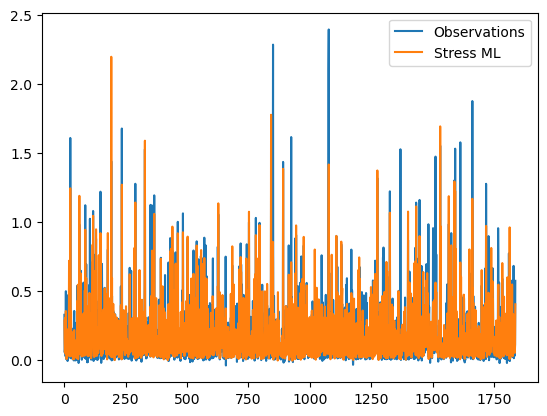

In [160]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [161]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

In [162]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3357818367002982

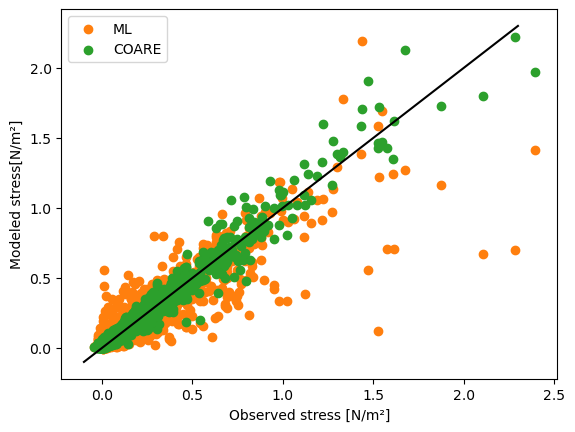

In [163]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

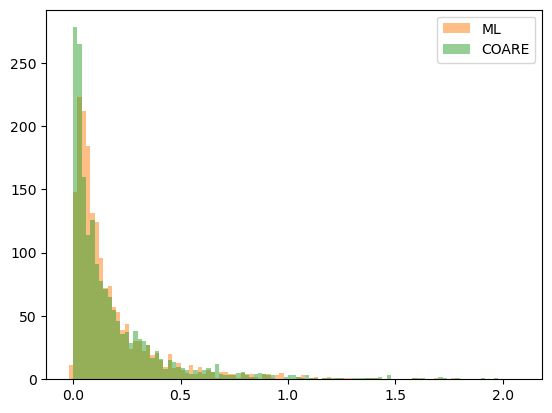

In [164]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [165]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [166]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [167]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 38ms/step - loss: 18.8585 - mean_absolute_error: 2.7092 - val_loss: 1.0141 - val_mean_absolute_error: 0.6345
Epoch 2/500
12/12 [==============================] - 0s 28ms/step - loss: 2.3847 - mean_absolute_error: 1.1016 - val_loss: 1.0376 - val_mean_absolute_error: 0.5557
Epoch 3/500
12/12 [==============================] - 0s 28ms/step - loss: 1.7288 - mean_absolute_error: 0.9259 - val_loss: 1.0446 - val_mean_absolute_error: 0.5483
Epoch 4/500
12/12 [==============================] - 0s 28ms/step - loss: 1.2778 - mean_absolute_error: 0.8207 - val_loss: 1.4620 - val_mean_absolute_error: 0.7336
Epoch 5/500
12/12 [==============================] - 0s 28ms/step - loss: 1.1538 - mean_absolute_error: 0.7824 - val_loss: 1.1741 - val_mean_absolute_error: 0.5762
Epoch 6/500
12/12 [==============================] - 0s 28ms/step - loss: 1.0740 - mean_absolute_error: 0.7477 - val_loss: 1.3628 - val_mean_absolute_error: 0.6764
Epoch 7/500
12/

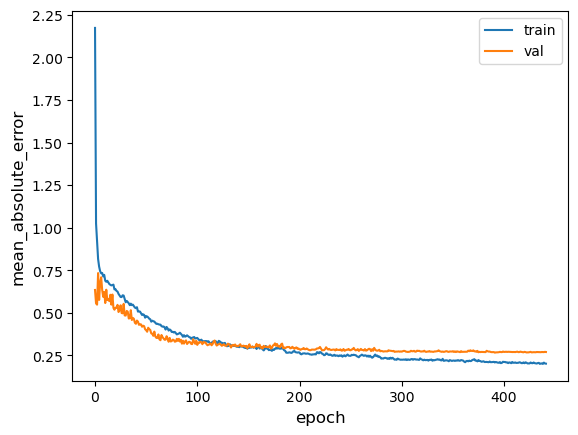

58/58 [==============================] - 0s 2ms/step - loss: 0.2836 - mean_absolute_error: 0.2810
Test accuracy 0.28098297119140625
Test loss 0.2835657596588135


In [168]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [169]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [170]:
rmse(y_test.values, y_test_pred)

0.33520629156495274

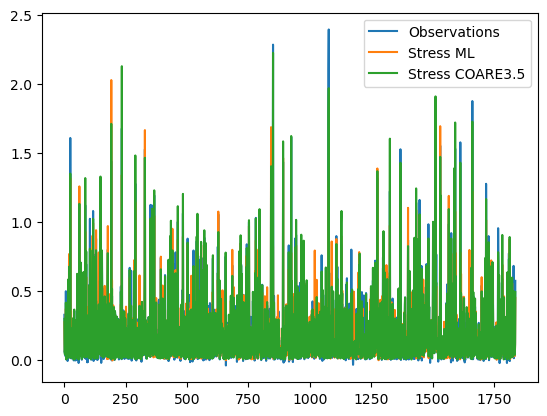

In [171]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

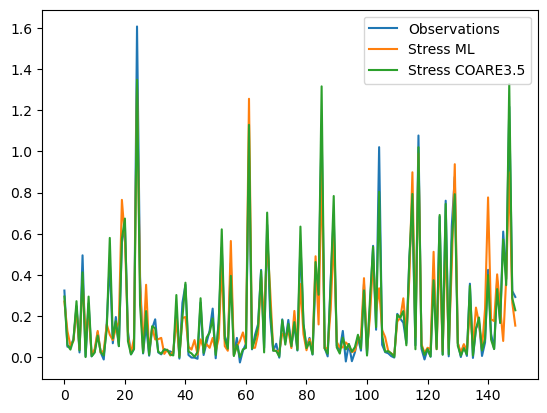

In [172]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [173]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87548852],
       [0.87548852, 1.        ]])

In [174]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

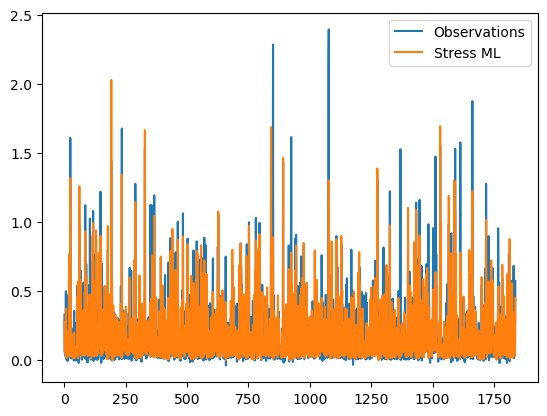

In [175]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [176]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

In [177]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.33520629156495274

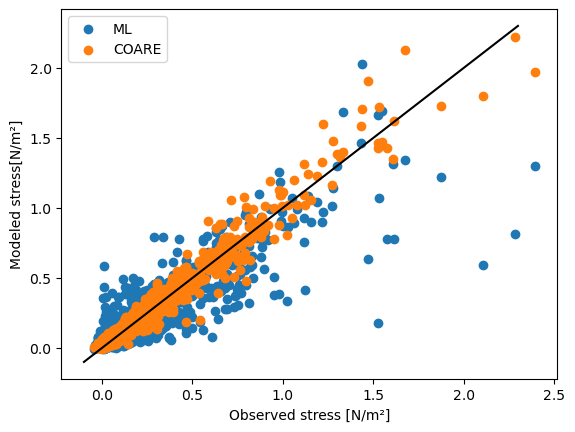

In [178]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

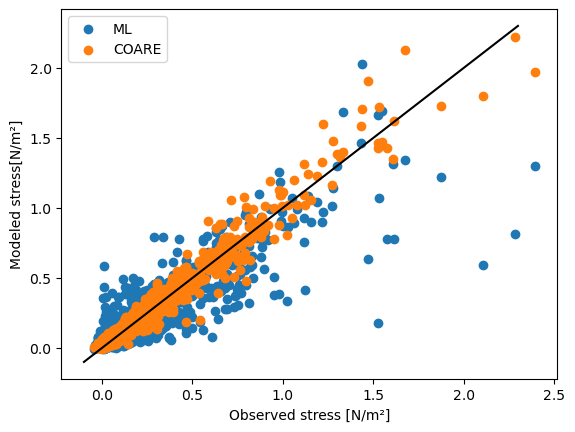

In [179]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [180]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [181]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [182]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 134ms/step - loss: 20.4403 - mean_absolute_error: 2.9810 - val_loss: 0.9612 - val_mean_absolute_error: 0.6438
Epoch 2/500
6/6 [==============================] - 1s 107ms/step - loss: 3.0006 - mean_absolute_error: 1.1983 - val_loss: 0.9794 - val_mean_absolute_error: 0.6232
Epoch 3/500
6/6 [==============================] - 1s 118ms/step - loss: 1.7258 - mean_absolute_error: 0.9842 - val_loss: 1.0210 - val_mean_absolute_error: 0.6129
Epoch 4/500
6/6 [==============================] - 1s 113ms/step - loss: 1.7048 - mean_absolute_error: 0.9257 - val_loss: 0.9556 - val_mean_absolute_error: 0.6167
Epoch 5/500
6/6 [==============================] - 1s 111ms/step - loss: 1.3548 - mean_absolute_error: 0.8403 - val_loss: 1.0269 - val_mean_absolute_error: 0.6078
Epoch 6/500
6/6 [==============================] - 1s 125ms/step - loss: 1.2250 - mean_absolute_error: 0.7984 - val_loss: 1.0055 - val_mean_absolute_error: 0.5729
Epoch 7/500
6/6 [====

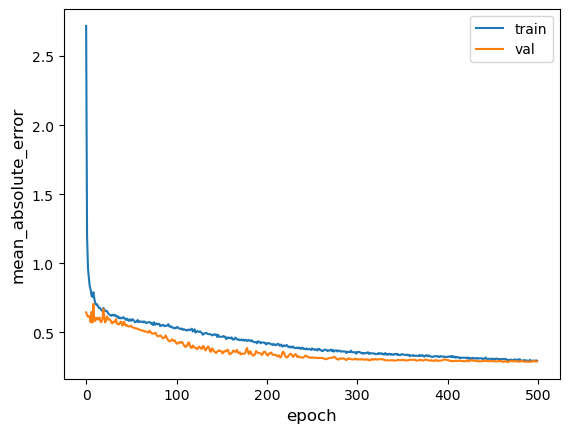

58/58 [==============================] - 0s 7ms/step - loss: 0.3288 - mean_absolute_error: 0.3023
Test accuracy 0.3023281395435333
Test loss 0.32883524894714355


In [183]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [184]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [185]:
rmse(y_test.values, y_test_pred)

0.33363271088182295

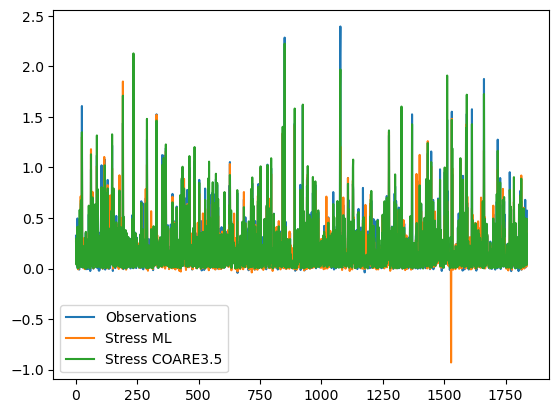

In [186]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

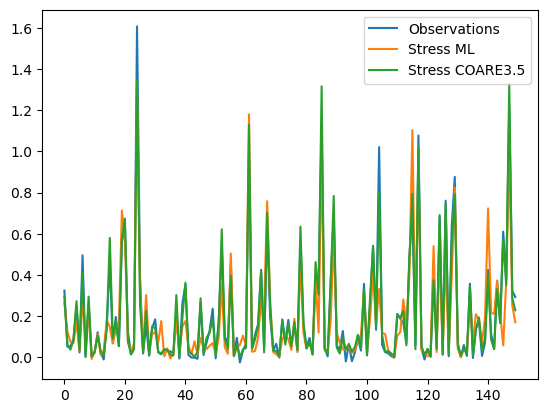

In [187]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [188]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85836252],
       [0.85836252, 1.        ]])

In [189]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

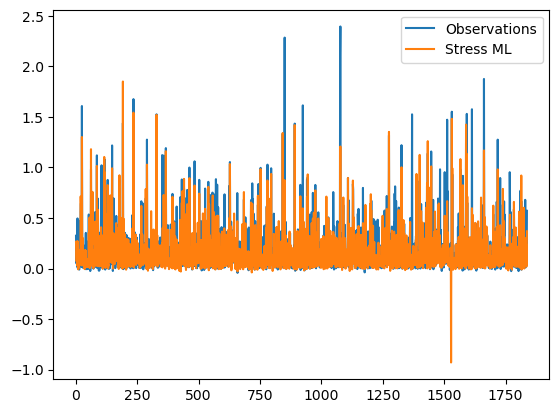

In [190]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [191]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.98123294],
       [0.98123294, 1.        ]])

In [192]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.33363271088182295

Text(0, 0.5, 'Stress ML [N/m²]')

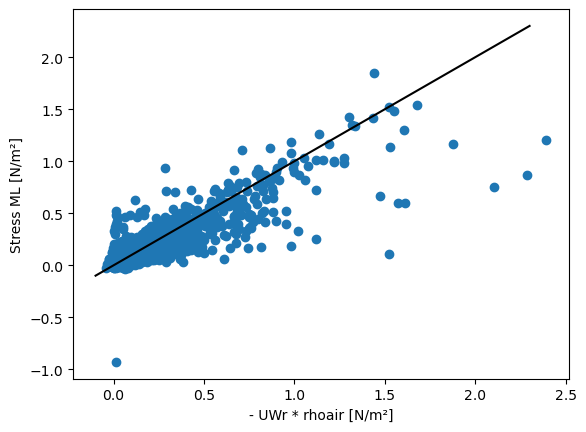

In [193]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

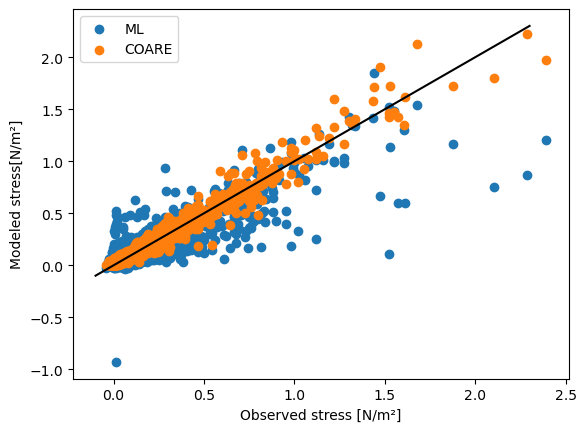

In [194]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()